p.247

In [1]:
import pylab

In [2]:
# コード16.1 住宅価格のプロット
def plotHousing(impression):
    """impressionは、flat、volatile、fairのいずれかの文字列と仮定する
       時間経過に伴う住宅価格の棒グラフを生成する"""
    pylab.figure(dpi=125)
    f = open('midWestHousingPrices.txt', 'r')
    # ファイルの各行は、アメリカ合衆国中西部の4半期ごとの価格を表す
    labels, prices = ([], [])
    for line in f:
        year, quarter, price = line.split()
        label = year[2:4] + '\n Q' + quarter[1]
        labels.append(label)
        prices.append(float(price)/1000)
    quarters = pylab.arange(len(labels)) # 棒グラフのx座標
    width = 0.8 # 棒グラフの幅
    if impression == 'flat':
        pylab.semilogy()
    pylab.bar(quarters, prices, width)
    pylab.xticks(quarters + width / 2.0, labels)
    pylab.title(u'米国中西部の住宅価格')
    pylab.xlabel(u'四半期')
    pylab.ylabel(u'平均価格 ($1000単位)')
    if impression == 'flat':
        pylab.ylim(10, 10 ** 3)
    elif impression == 'volatile':
        pylab.ylim(180, 220)
    elif impression == 'fair':
        pylab.ylim(150, 250)
    else:
        raise ValueError

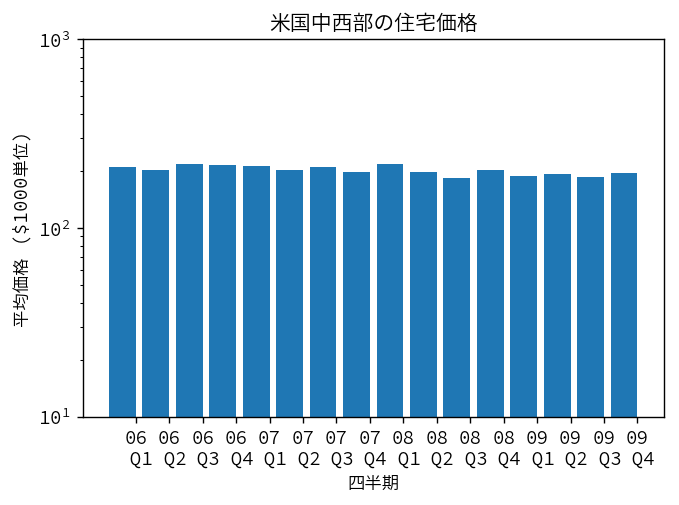

<Figure size 432x288 with 0 Axes>

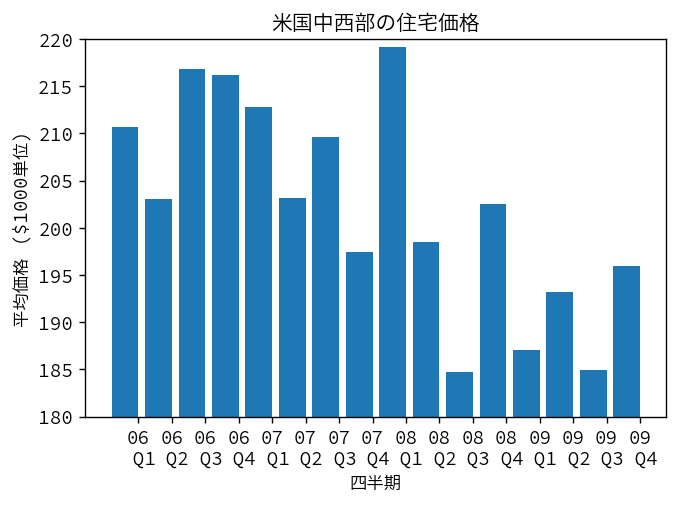

<Figure size 432x288 with 0 Axes>

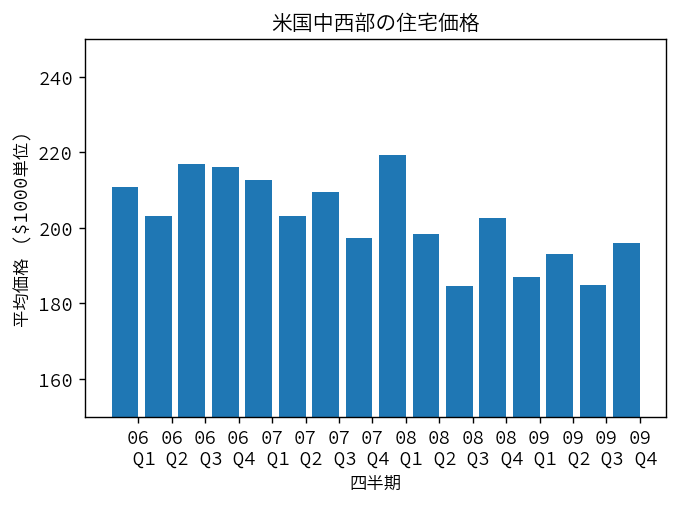

In [3]:
plotHousing('flat')
pylab.figure()
plotHousing('volatile')
pylab.figure()
plotHousing('fair')

p.255

In [4]:
import random

In [5]:
# コード16.2 拒食症患者のうち、48人以上が6月生まれである確率
def juneProb(numTrials):
    june48 = 0
    for trial in range(numTrials):
        june = 0
        for i in range(446):
            if random.randint(1,12) == 6:
                june += 1
        if june >= 48:
            june48 += 1
    jProb = june48/float(numTrials)
    print '6月に少なくとも48人が生まれる確率 =', jProb

In [6]:
juneProb(10000)

6月に少なくとも48人が生まれる確率 = 0.0413


In [7]:
# コード16.3 拒食症患者のうち、48人以上が生まれた月が少なくとも1つ存在する確率
def anyProb(numTrials):
    anyMonth48 = 0
    for trial in range(numTrials):
        months = [0] * 12
        for i in range(446):
            months[random.randint(0, 11)] += 1
        if max(months) >= 48:
            anyMonth48 += 1
    aProb = anyMonth48 / float(numTrials)
    print '48人以上が生まれた月が少なくとも1つ存在する確率 =', aProb

In [8]:
anyProb(10000)

48人以上が生まれた月が少なくとも1つ存在する確率 = 0.44


In [9]:
def variance(X):
    """Xを数のリストとする
       Xの分散を返す"""
    mean = sum(X) / len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean) ** 2
    return tot / len(X)

In [10]:
def stdDev(X):
    """Xを数のリストとする
       Xの標準偏差を返す"""
    return variance(X) ** 0.5

In [11]:
def covariance(X, Y):
    """XとYを同じ要素数の数のリストとする
       XとYの共分散を返す"""
    meanX = sum(X) / len(X)
    meanY = sum(Y) / len(Y)
    tot = 0.0
    for i in range(len(X)):
        tot += (X[i] - meanX) * (Y[i] - meanY)
    return tot / len(X)

In [12]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    xs = []
    ys = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        x, y = line.split(' ')
        xs.append(float(x))
        ys.append(float(y))
    dataFile.close()
    return (xs, ys)

In [13]:
def Anscombe(inputFile):
    xs, ys = getData(inputFile)
    xs = pylab.array(xs)
    ys = pylab.array(ys)
    print "xの平均=" + str(xs.sum() / len(xs))
    print "xの分散=" + str(variance(xs))
    print "yの平均=" + str(round(ys.sum() / len(ys), 2))
    print "yの分散=" + str(round(variance(ys), 2))
    print "xとyの相関係数=" + str(round(covariance(xs, ys) / stdDev(xs) / stdDev(ys), 2))
    pylab.plot(xs, ys, 'bo')
    a, b = pylab.polyfit(xs, ys, 1)
    plotXs = [0, 20]
    plotYs = a * pylab.array(plotXs) + b
    pylab.plot(plotXs, plotYs, label = 'y = ' + str(round(a, 2)) + 'x+' + str(round(b, 2)))
    pylab.legend(loc = 'best')

xの平均=9.0
xの分散=10.0
yの平均=7.5
yの分散=3.75
xとyの相関係数=0.82


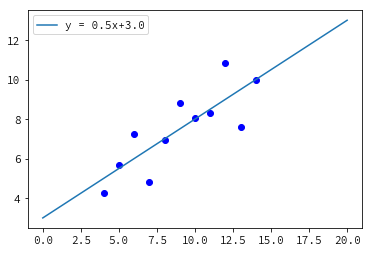

In [14]:
Anscombe('Anscombe1.txt')

xの平均=9.0
xの分散=10.0
yの平均=7.5
yの分散=3.75
xとyの相関係数=0.82


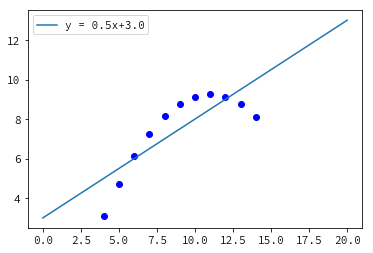

In [15]:
Anscombe('Anscombe2.txt')

xの平均=9.0
xの分散=10.0
yの平均=7.5
yの分散=3.75
xとyの相関係数=0.82


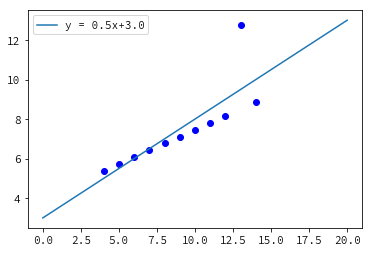

In [16]:
Anscombe('Anscombe3.txt')

xの平均=9.0
xの分散=10.0
yの平均=7.5
yの分散=3.75
xとyの相関係数=0.82


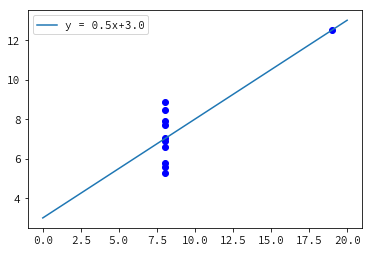

In [17]:
Anscombe('Anscombe4.txt')